In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installations

In [2]:
!pip install keras-tuner==1.4.5
!pip install autokeras==1.1.0
!pip install keras==2.14.0
!pip install tensorflow==2.14.0
!pip install tensorflow-addons==0.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.

In [ ]:
# !pip install -U fastai
# !pip install efficientnet_pytorch

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import tensorflow as tf
import autokeras as ak

Using TensorFlow backend


In [ ]:
# from fastai import *
# from fastai.vision import *
# from fastai.vision.all import *
# import glob
# from tqdm import tqdm

### Reading Images

In [ ]:
train_dir = '/content/drive/MyDrive/manya/Major_Project_Images/train'
test_dir = '/content/drive/MyDrive/manya/Major_Project_Images/valid'
val_dir = '/content/drive/MyDrive/manya/Major_Project_Images/test'

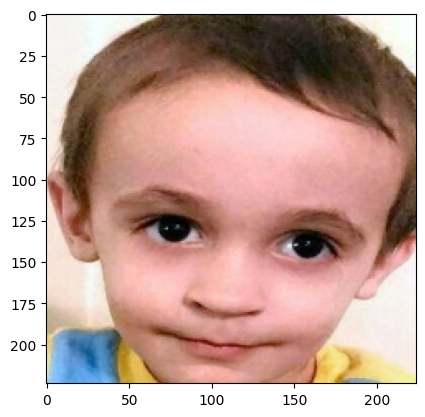

In [ ]:
img = load_img('/content/drive/MyDrive/manya/Major_Project_Images/train/autistic/0001.jpg')
plt.imshow(img,cmap='brg')

In [ ]:
img_to_array(img).shape

(224, 224, 3)

In [ ]:
img_to_array(img)

array([[[245., 244., 240.],
        [243., 242., 238.],
        [242., 241., 237.],
        ...,
        [249., 255., 255.],
        [249., 255., 255.],
        [249., 255., 255.]],

       [[245., 244., 240.],
        [244., 243., 239.],
        [244., 243., 239.],
        ...,
        [249., 255., 255.],
        [249., 255., 255.],
        [249., 255., 255.]],

       [[247., 243., 240.],
        [247., 243., 240.],
        [247., 243., 240.],
        ...,
        [249., 255., 255.],
        [249., 255., 255.],
        [249., 255., 255.]],

       ...,

       [[191., 223., 236.],
        [178., 213., 232.],
        [162., 206., 233.],
        ...,
        [246., 241., 159.],
        [245., 240., 159.],
        [246., 240., 162.]],

       [[175., 210., 232.],
        [167., 205., 228.],
        [157., 202., 231.],
        ...,
        [249., 242., 161.],
        [245., 240., 159.],
        [245., 240., 159.]],

       [[169., 205., 231.],
        [165., 205., 231.],
        [159., 2

### Processing Images

- resize images
- image to array
- scaling

In [ ]:
# Train Data
from tqdm import tqdm
train_data =[]
#mapping={0:'autistic', 1:'non_autistic'}
count=0
for file in ['autistic', 'non_autistic']:
    path=os.path.join(train_dir,file)
    for im in tqdm(os.listdir(path)):
        image=load_img(os.path.join(path,im),color_mode='rgb',target_size=(224,224,3))
        image=img_to_array(image)
        image=image/255.0
        train_data.append([image,count])
    count=count+1

100%|██████████| 1268/1268 [00:11<00:00, 110.25it/s]


In [ ]:
train_data[1][1]

0

In [ ]:
# Val Data
from tqdm import tqdm
val_data =[]
#mapping={0:'autistic', 1:'non_autistic'}
count=0
for file in ['autistic', 'non_autistic']:
    path=os.path.join(val_dir,file)
    for im in tqdm(os.listdir(path)):
        image=load_img(os.path.join(path,im),color_mode='rgb',target_size=(224,224,3))
        image=img_to_array(image)
        image=image/255.0
        val_data.append([image,count])
    count=count+1

100%|██████████| 150/150 [00:01<00:00, 140.73it/s]


In [ ]:
# Test Data

from tqdm import tqdm
test_data =[]
#mapping={0:'autistic', 1:'non_autistic'}
count=0
for file in ['autistic', 'non_autistic']:
    path=os.path.join(test_dir,file)
    for im in tqdm(os.listdir(path)):
        image=load_img(os.path.join(path,im),color_mode='rgb',target_size=(224,224,3))
        image=img_to_array(image)
        image=image/255.0
        test_data.append([image,count])
    count=count+1

100%|██████████| 50/50 [00:09<00:00,  5.18it/s]


In [ ]:
np.random.shuffle(train_data)
np.random.shuffle(val_data)

In [ ]:
X_train,y_train=zip(*train_data)

In [ ]:
c0=0
c1=0
for i in y_train:
    if i==0:
        c0+=1
    elif i==1:
        c1+=1
print("Total no. of images in train dataset are {}".format(len(y_train)))
print("Number of Autistic images: {}\nNumber of Non-Autistic images: {}".format(c0,c1))

Total no. of images in train dataset are 2536
Number of Autistic images: 1268
Number of Non-Autistic images: 1268


In [ ]:
X_val,y_val=zip(*val_data)

In [ ]:
c0=0
c1=0
for i in y_val:
    if i==0:
        c0+=1
    elif i==1:
        c1+=1
print("Total no. of images in validation dataset are {}".format(len(y_val)))
print("Number of Autistic images: {}\nNumber of Non-Autistic images: {}".format(c0,c1))

Total no. of images in validation dataset are 300
Number of Autistic images: 150
Number of Non-Autistic images: 150


In [ ]:
X_test,y_test=zip(*test_data)

In [ ]:
c0=0
c1=0
for i in y_test:
    if i==0:
        c0+=1
    elif i==1:
        c1+=1
print("Total no. of images in test dataset are {}".format(len(y_test)))
print("Number of Autistic images: {}\nNumber of Non-Autistic images: {}".format(c0,c1))

Total no. of images in test dataset are 100
Number of Autistic images: 50
Number of Non-Autistic images: 50


In [ ]:
X_train =np.array(X_train)
y_train =np.array(y_train)
print("Data Shape:{}\nLabels shape: {}".format(X_train.shape,y_train.shape))

Data Shape:(2536, 224, 224, 3)
Labels shape: (2536,)


In [ ]:
X_val =np.array(X_val)
y_val =np.array(y_val)
print("Data Shape:{}\nLabels shape: {}".format(X_val.shape,y_val.shape))

Data Shape:(300, 224, 224, 3)
Labels shape: (300,)


In [ ]:
X_test =np.array(X_test)
y_test =np.array(y_test)
print("Data Shape:{}\nLabels shape: {}".format(X_test.shape,y_test.shape))

Data Shape:(100, 224, 224, 3)
Labels shape: (100,)


In [ ]:
X = np.concatenate((X_train,X_val,X_test),axis=0)
print(X.shape)

(2936, 224, 224, 3)


In [ ]:
y = np.concatenate((y_train,y_val,y_test),axis=0)
print(y.shape)

(2936,)


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
print(X_temp.shape,y_temp.shape,X_test.shape,y_test.shape)

(2348, 224, 224, 3) (2348,) (588, 224, 224, 3) (588,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2,stratify=y_temp)
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)

(1878, 224, 224, 3) (1878,) (470, 224, 224, 3) (470,)


In [ ]:
print(X_train.shape,X_val.shape,X_test.shape)
print(y_train.shape,y_val.shape,y_test.shape)

(1878, 224, 224, 3) (470, 224, 224, 3) (588, 224, 224, 3)
(1878,) (470,) (588,)


In [ ]:
'''# save numpy as binary file
from numpy import save

np.save('/content/drive/MyDrive/manya/Major_Project_Images/new_X_train.npy', X_train)
np.save('/content/drive/MyDrive/manya/Major_Project_Images/new_X_val.npy', X_val)
np.save('/content/drive/MyDrive/manya/Major_Project_Images/new_X_test.npy', X_test)

np.save('/content/drive/MyDrive/manya/Major_Project_Images/new_y_train.npy', y_train)
np.save('/content/drive/MyDrive/manya/Major_Project_Images/new_y_val.npy', y_val)
np.save('/content/drive/MyDrive/manya/Major_Project_Images/new_y_test.npy', y_test)'''

In [ ]:
# Load the arrays from the saved .npy files
from numpy import load

X_train = np.load('/content/drive/MyDrive/manya/Major_Project_Images/new_X_train.npy')
X_val = np.load('/content/drive/MyDrive/manya/Major_Project_Images/new_X_val.npy')
X_test = np.load('/content/drive/MyDrive/manya/Major_Project_Images/new_X_test.npy')

y_train = np.load('/content/drive/MyDrive/manya/Major_Project_Images/new_y_train.npy')
y_val = np.load('/content/drive/MyDrive/manya/Major_Project_Images/new_y_val.npy')
y_test = np.load('/content/drive/MyDrive/manya/Major_Project_Images/new_y_test.npy')

# MODELLING

### **Convolutional Neural Network**

In [ ]:
# Funtional API
import autokeras as ak
import tensorflow as tf
import tensorflow_addons as tfa

input_node = ak.ImageInput()
output_node = ak.ImageBlock(augment=True,normalize=True, block_type = 'vanilla')(input_node)
output_node = ak.ClassificationHead()(output_node)
model = ak.AutoModel(inputs=input_node,outputs=output_node,max_trials=10, overwrite=True,
                         objective='val_accuracy',
                         metrics=['accuracy'],
                         )
model.fit(X_train,y_train, validation_data = (X_val, y_val))
best_model = model.export_model()
best_model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_Vanilla')

Trial 10 Complete [00h 02m 53s]
val_accuracy: 0.7510638236999512

Best val_accuracy So Far: 0.7531914710998535
Total elapsed time: 00h 37m 16s


In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 224, 224, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 224, 224, 3)       7         
 on)                                                             
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248  

In [ ]:
import autokeras as ak
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import load_model
model_vanilla =load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_Vanilla',custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
y_pred_vanilla = model_vanilla.predict(X_test)

19/19 [==============================] - 10s 38ms/step


In [ ]:
y_pred_final = []
for i in range(y_pred_vanilla.shape[0]):
    if y_pred_vanilla[i]>=0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)
y_pred_final = np.array(y_pred_final)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_final)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       294
           1       0.75      0.68      0.71       294

    accuracy                           0.73       588
   macro avg       0.73      0.73      0.73       588
weighted avg       0.73      0.73      0.73       588



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final)
print(cm)

[[228  66]
 [ 95 199]]


0.7802767365449581


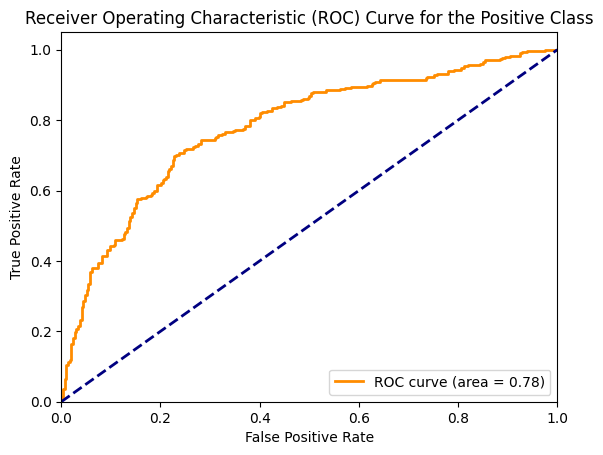

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_vanilla[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

## **Pre-Trained Models**

### 1. XCEPTION NET - Best Model

In [ ]:
# functional API
import autokeras as ak
import tensorflow as tf
import tensorflow_addons as tfa

input_node = ak.ImageInput()
output_node = ak.ImageBlock(augment=True,normalize=True, block_type = 'xception')(input_node)
output_node = ak.ClassificationHead()(output_node)
model = ak.AutoModel(inputs=input_node,outputs=output_node,max_trials=20, overwrite=True,
                         #objective='val_accuracy',
                         metrics=['accuracy']
                         )
model.fit(X_train,y_train, validation_data = (X_val, y_val))

best_model = model.export_model()

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0                 |0                 |image_block_1/image_augmentation_1/translation_factor
True              |True              |image_block_1/image_augmentation_1/horizontal_flip
True              |True              |image_block_1/image_augmentation_1/vertical_flip
0                 |0                 |image_block_1/image_augmentation_1/rotation_factor
0                 |0                 |image_block_1/image_augmentation_1/zoom_factor
0                 |0                 |image_block_1/image_augmentation_1/contrast_factor
False             |False             |image_block_1/xception_block_1/pretrained
False             |False             |image_block_1/xception_block_1/imagenet_size
flatten           |flatten           |classification_head_1/spatial_reduction_1/reduction_type
0                 |0                 |classification_head_1/dropout
adam              |adam              |optimizer
2e-05          

In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 224, 224, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 224, 224, 3)       7         
 on)                                                             
                                                                 
 random_translation (Random  (None, 224, 224, 3)       0         
 Translation)                                                    
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                             

In [ ]:
from tensorflow.keras.models import load_model
import autokeras as ak
model_xn =load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_new_XceptionNet',custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
y_pred_xn = model_xn.predict(X_test)

19/19 [==============================] - 160s 8s/step


In [ ]:
# mapping probability to labels: {autistic:0, non-autistic:1}

y_pred = []
for i in range(y_pred_xn.shape[0]):
    if y_pred_xn[i]>=0.5:
        y_pred.append(1) # non-autistic
    else:
        y_pred.append(0) # autistic
y_pred = np.array(y_pred)

In [ ]:
# Base Model Results

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       294
           1       0.88      0.82      0.85       294

    accuracy                           0.85       588
   macro avg       0.86      0.85      0.85       588
weighted avg       0.86      0.85      0.85       588



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[262  32]
 [ 54 240]]


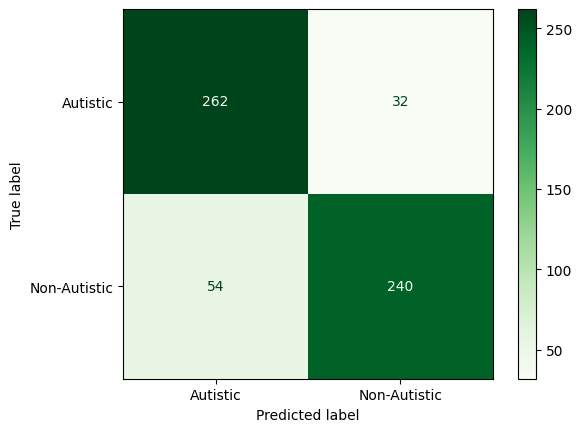

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Autistic', 'Non-Autistic'])
cm_display.plot(cmap='Greens')
plt.show()

0.9208200286917488


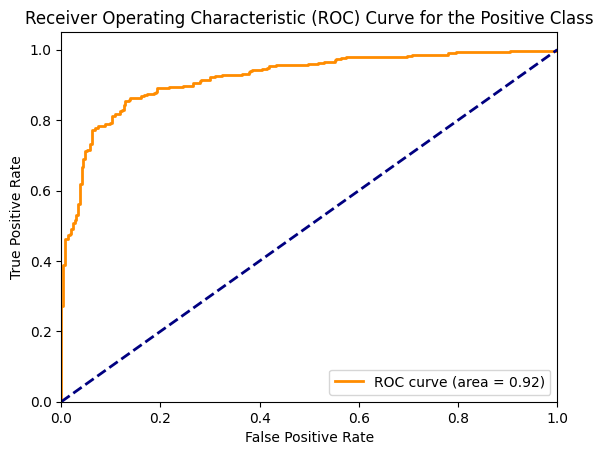

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_xn[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

#### Improved Model

In [ ]:
learn_inf = load_learner('/content/drive/MyDrive/manya/Major_Project_Images/export.pkl')

In [ ]:
test_files = glob.glob('/content/drive/MyDrive/manya/Major_Project_Images/test/*/*.*')
files = get_image_files('/content/drive/MyDrive/manya/Major_Project_Images/test')
len(test_files)

300

In [ ]:
y_test = []
for i in range(0,len((test_files))):
    y_test.append(test_files[i].split('/')[-2])
print(len(y_test))

300


In [ ]:
y_pred = []
for i in tqdm(range(0,len((test_files)))):
    pred = learn_inf.predict(test_files[i])
    y_pred.append(pred[0])
print(len(y_pred))

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 1/300 [00:00<03:33,  1.40it/s]

  1%|          | 2/300 [00:01<03:23,  1.47it/s]

  1%|          | 3/300 [00:02<03:16,  1.51it/s]

  1%|▏         | 4/300 [00:02<03:12,  1.54it/s]

  2%|▏         | 5/300 [00:03<03:06,  1.58it/s]

  2%|▏         | 6/300 [00:03<03:09,  1.55it/s]

  2%|▏         | 7/300 [00:04<03:07,  1.56it/s]

  3%|▎         | 8/300 [00:05<03:39,  1.33it/s]

  3%|▎         | 9/300 [00:06<04:14,  1.14it/s]

  3%|▎         | 10/300 [00:07<03:50,  1.26it/s]

  4%|▎         | 11/300 [00:07<03:34,  1.35it/s]

  4%|▍         | 12/300 [00:08<03:25,  1.40it/s]

  4%|▍         | 13/300 [00:09<03:21,  1.43it/s]

  5%|▍         | 14/300 [00:09<03:14,  1.47it/s]

  5%|▌         | 15/300 [00:10<02:56,  1.62it/s]

  5%|▌         | 16/300 [00:10<02:40,  1.77it/s]

  6%|▌         | 17/300 [00:11<02:28,  1.90it/s]

  6%|▌         | 18/300 [00:11<02:20,  2.01it/s]

  6%|▋         | 19/300 [00:12<02:16,  2.06it/s]

  7%|▋         | 20/300 [00:12<02:11,  2.13it/s]

  7%|▋         | 21/300 [00:12<02:07,  2.18it/s]

  7%|▋         | 22/300 [00:13<02:06,  2.19it/s]

  8%|▊         | 23/300 [00:13<02:03,  2.24it/s]

  8%|▊         | 24/300 [00:14<02:03,  2.24it/s]

  8%|▊         | 25/300 [00:14<02:01,  2.27it/s]

  9%|▊         | 26/300 [00:15<02:00,  2.27it/s]

  9%|▉         | 27/300 [00:15<01:59,  2.28it/s]

  9%|▉         | 28/300 [00:16<02:00,  2.26it/s]

 10%|▉         | 29/300 [00:16<02:00,  2.25it/s]

 10%|█         | 30/300 [00:16<01:59,  2.26it/s]

 10%|█         | 31/300 [00:17<01:58,  2.28it/s]

 11%|█         | 32/300 [00:17<01:57,  2.29it/s]

 11%|█         | 33/300 [00:18<01:55,  2.31it/s]

 11%|█▏        | 34/300 [00:18<01:57,  2.27it/s]

 12%|█▏        | 35/300 [00:19<01:56,  2.28it/s]

 12%|█▏        | 36/300 [00:19<01:56,  2.27it/s]

 12%|█▏        | 37/300 [00:20<02:00,  2.18it/s]

 13%|█▎        | 38/300 [00:20<02:13,  1.96it/s]

 13%|█▎        | 39/300 [00:21<02:20,  1.86it/s]

 13%|█▎        | 40/300 [00:21<02:27,  1.76it/s]

 14%|█▎        | 41/300 [00:22<02:33,  1.69it/s]

 14%|█▍        | 42/300 [00:23<02:35,  1.66it/s]

 14%|█▍        | 43/300 [00:23<02:38,  1.62it/s]

 15%|█▍        | 44/300 [00:24<02:39,  1.61it/s]

 15%|█▌        | 45/300 [00:25<02:38,  1.61it/s]

 15%|█▌        | 46/300 [00:25<02:29,  1.70it/s]

 16%|█▌        | 47/300 [00:26<02:18,  1.83it/s]

 16%|█▌        | 48/300 [00:26<02:09,  1.95it/s]

 16%|█▋        | 49/300 [00:26<02:04,  2.01it/s]

 17%|█▋        | 50/300 [00:27<02:00,  2.08it/s]

 17%|█▋        | 51/300 [00:27<01:59,  2.08it/s]

 17%|█▋        | 52/300 [00:28<01:56,  2.13it/s]

 18%|█▊        | 53/300 [00:28<01:55,  2.14it/s]

 18%|█▊        | 54/300 [00:29<01:52,  2.18it/s]

 18%|█▊        | 55/300 [00:29<01:49,  2.23it/s]

 19%|█▊        | 56/300 [00:30<01:49,  2.23it/s]

 19%|█▉        | 57/300 [00:30<01:48,  2.24it/s]

 19%|█▉        | 58/300 [00:31<01:49,  2.21it/s]

 20%|█▉        | 59/300 [00:31<01:48,  2.23it/s]

 20%|██        | 60/300 [00:31<01:48,  2.20it/s]

 20%|██        | 61/300 [00:32<01:48,  2.21it/s]

 21%|██        | 62/300 [00:32<01:47,  2.22it/s]

 21%|██        | 63/300 [00:33<01:46,  2.23it/s]

 21%|██▏       | 64/300 [00:33<01:45,  2.25it/s]

 22%|██▏       | 65/300 [00:34<01:45,  2.23it/s]

 22%|██▏       | 66/300 [00:34<01:45,  2.23it/s]

 22%|██▏       | 67/300 [00:35<01:44,  2.22it/s]

 23%|██▎       | 68/300 [00:35<01:48,  2.14it/s]

 23%|██▎       | 69/300 [00:36<01:58,  1.94it/s]

 23%|██▎       | 70/300 [00:36<02:05,  1.83it/s]

 24%|██▎       | 71/300 [00:37<02:11,  1.74it/s]

 24%|██▍       | 72/300 [00:38<02:12,  1.72it/s]

 24%|██▍       | 73/300 [00:38<02:15,  1.68it/s]

 25%|██▍       | 74/300 [00:39<02:18,  1.63it/s]

 25%|██▌       | 75/300 [00:39<02:18,  1.63it/s]

 25%|██▌       | 76/300 [00:40<02:18,  1.62it/s]

 26%|██▌       | 77/300 [00:41<02:14,  1.65it/s]

 26%|██▌       | 78/300 [00:41<02:03,  1.80it/s]

 26%|██▋       | 79/300 [00:42<01:55,  1.92it/s]

 27%|██▋       | 80/300 [00:42<01:50,  2.00it/s]

 27%|██▋       | 81/300 [00:42<01:45,  2.08it/s]

 27%|██▋       | 82/300 [00:43<01:42,  2.14it/s]

 28%|██▊       | 83/300 [00:43<01:39,  2.19it/s]

 28%|██▊       | 84/300 [00:44<01:36,  2.24it/s]

 28%|██▊       | 85/300 [00:44<01:36,  2.22it/s]

 29%|██▊       | 86/300 [00:45<01:34,  2.26it/s]

 29%|██▉       | 87/300 [00:45<01:34,  2.25it/s]

 29%|██▉       | 88/300 [00:45<01:34,  2.25it/s]

 30%|██▉       | 89/300 [00:46<01:33,  2.25it/s]

 30%|███       | 90/300 [00:46<01:32,  2.26it/s]

 30%|███       | 91/300 [00:47<01:32,  2.25it/s]

 31%|███       | 92/300 [00:47<01:33,  2.23it/s]

 31%|███       | 93/300 [00:48<02:05,  1.65it/s]

 31%|███▏      | 94/300 [00:49<02:29,  1.38it/s]

 32%|███▏      | 95/300 [00:50<02:13,  1.54it/s]

 32%|███▏      | 96/300 [00:50<02:00,  1.69it/s]

 32%|███▏      | 97/300 [00:51<01:51,  1.82it/s]

 33%|███▎      | 98/300 [00:52<02:20,  1.44it/s]

 33%|███▎      | 99/300 [00:52<02:26,  1.38it/s]

 33%|███▎      | 100/300 [00:53<02:28,  1.35it/s]

 34%|███▎      | 101/300 [00:54<02:44,  1.21it/s]

 34%|███▍      | 102/300 [00:56<03:58,  1.21s/it]

 34%|███▍      | 103/300 [00:58<04:30,  1.38s/it]

 35%|███▍      | 104/300 [00:59<04:02,  1.24s/it]

 35%|███▌      | 105/300 [01:00<03:40,  1.13s/it]

 35%|███▌      | 106/300 [01:00<03:05,  1.05it/s]

 36%|███▌      | 107/300 [01:01<02:33,  1.26it/s]

 36%|███▌      | 108/300 [01:01<02:11,  1.46it/s]

 36%|███▋      | 109/300 [01:02<01:57,  1.63it/s]

 37%|███▋      | 110/300 [01:02<01:46,  1.78it/s]

 37%|███▋      | 111/300 [01:03<01:39,  1.90it/s]

 37%|███▋      | 112/300 [01:03<01:34,  2.00it/s]

 38%|███▊      | 113/300 [01:04<01:30,  2.07it/s]

 38%|███▊      | 114/300 [01:04<01:26,  2.14it/s]

 38%|███▊      | 115/300 [01:04<01:24,  2.19it/s]

 39%|███▊      | 116/300 [01:05<01:23,  2.22it/s]

 39%|███▉      | 117/300 [01:05<01:22,  2.23it/s]

 39%|███▉      | 118/300 [01:06<01:21,  2.22it/s]

 40%|███▉      | 119/300 [01:06<01:20,  2.25it/s]

 40%|████      | 120/300 [01:07<01:20,  2.24it/s]

 40%|████      | 121/300 [01:07<01:19,  2.26it/s]

 41%|████      | 122/300 [01:08<01:19,  2.24it/s]

 41%|████      | 123/300 [01:08<01:19,  2.22it/s]

 41%|████▏     | 124/300 [01:08<01:19,  2.22it/s]

 42%|████▏     | 125/300 [01:09<01:19,  2.20it/s]

 42%|████▏     | 126/300 [01:09<01:18,  2.21it/s]

 42%|████▏     | 127/300 [01:10<01:18,  2.20it/s]

 43%|████▎     | 128/300 [01:10<01:21,  2.12it/s]

 43%|████▎     | 129/300 [01:11<01:29,  1.92it/s]

 43%|████▎     | 130/300 [01:12<01:33,  1.81it/s]

 44%|████▎     | 131/300 [01:12<01:37,  1.73it/s]

 44%|████▍     | 132/300 [01:13<01:38,  1.70it/s]

 44%|████▍     | 133/300 [01:13<01:41,  1.65it/s]

 45%|████▍     | 134/300 [01:16<03:09,  1.14s/it]

 45%|████▌     | 135/300 [01:17<02:44,  1.00it/s]

 45%|████▌     | 136/300 [01:18<03:06,  1.14s/it]

 46%|████▌     | 137/300 [01:18<02:32,  1.07it/s]

 46%|████▌     | 138/300 [01:19<02:07,  1.27it/s]

 46%|████▋     | 139/300 [01:19<01:50,  1.46it/s]

 47%|████▋     | 140/300 [01:20<01:39,  1.61it/s]

 47%|████▋     | 141/300 [01:20<01:31,  1.74it/s]

 47%|████▋     | 142/300 [01:21<01:24,  1.86it/s]

 48%|████▊     | 143/300 [01:21<01:20,  1.94it/s]

 48%|████▊     | 144/300 [01:22<01:17,  2.01it/s]

 48%|████▊     | 145/300 [01:22<01:14,  2.08it/s]

 49%|████▊     | 146/300 [01:23<01:13,  2.09it/s]

 49%|████▉     | 147/300 [01:23<01:11,  2.13it/s]

 49%|████▉     | 148/300 [01:23<01:11,  2.13it/s]

 50%|████▉     | 149/300 [01:24<01:10,  2.16it/s]

 50%|█████     | 150/300 [01:24<01:09,  2.15it/s]

 50%|█████     | 151/300 [01:25<01:08,  2.18it/s]

 51%|█████     | 152/300 [01:25<01:06,  2.21it/s]

 51%|█████     | 153/300 [01:26<01:06,  2.20it/s]

 51%|█████▏    | 154/300 [01:26<01:14,  1.97it/s]

 52%|█████▏    | 155/300 [01:27<01:17,  1.86it/s]

 52%|█████▏    | 156/300 [01:28<01:22,  1.74it/s]

 52%|█████▏    | 157/300 [01:28<01:24,  1.68it/s]

 53%|█████▎    | 158/300 [01:29<01:25,  1.65it/s]

 53%|█████▎    | 159/300 [01:30<01:26,  1.63it/s]

 53%|█████▎    | 160/300 [01:30<01:25,  1.63it/s]

 54%|█████▎    | 161/300 [01:31<01:25,  1.63it/s]

 54%|█████▍    | 162/300 [01:31<01:24,  1.63it/s]

 54%|█████▍    | 163/300 [01:32<01:19,  1.72it/s]

 55%|█████▍    | 164/300 [01:32<01:13,  1.85it/s]

 55%|█████▌    | 165/300 [01:33<01:09,  1.93it/s]

 55%|█████▌    | 166/300 [01:33<01:06,  2.01it/s]

 56%|█████▌    | 167/300 [01:34<01:03,  2.09it/s]

 56%|█████▌    | 168/300 [01:34<01:02,  2.11it/s]

 56%|█████▋    | 169/300 [01:35<01:01,  2.14it/s]

 57%|█████▋    | 170/300 [01:35<01:00,  2.17it/s]

 57%|█████▋    | 171/300 [01:35<00:59,  2.19it/s]

 57%|█████▋    | 172/300 [01:36<00:59,  2.17it/s]

 58%|█████▊    | 173/300 [01:36<00:58,  2.18it/s]

 58%|█████▊    | 174/300 [01:37<00:57,  2.19it/s]

 58%|█████▊    | 175/300 [01:37<00:57,  2.19it/s]

 59%|█████▊    | 176/300 [01:38<00:56,  2.19it/s]

 59%|█████▉    | 177/300 [01:38<00:56,  2.18it/s]

 59%|█████▉    | 178/300 [01:39<00:55,  2.21it/s]

 60%|█████▉    | 179/300 [01:39<00:54,  2.21it/s]

 60%|██████    | 180/300 [01:40<00:53,  2.23it/s]

 60%|██████    | 181/300 [01:40<00:53,  2.22it/s]

 61%|██████    | 182/300 [01:40<00:52,  2.25it/s]

 61%|██████    | 183/300 [01:41<00:51,  2.25it/s]

 61%|██████▏   | 184/300 [01:41<00:52,  2.22it/s]

 62%|██████▏   | 185/300 [01:42<00:54,  2.10it/s]

 62%|██████▏   | 186/300 [01:43<01:00,  1.88it/s]

 62%|██████▏   | 187/300 [01:43<01:04,  1.76it/s]

 63%|██████▎   | 188/300 [01:44<01:06,  1.70it/s]

 63%|██████▎   | 189/300 [01:44<01:06,  1.67it/s]

 63%|██████▎   | 190/300 [01:45<01:06,  1.66it/s]

 64%|██████▎   | 191/300 [01:46<01:07,  1.62it/s]

 64%|██████▍   | 192/300 [01:46<01:06,  1.61it/s]

 64%|██████▍   | 193/300 [01:47<01:06,  1.61it/s]

 65%|██████▍   | 194/300 [01:48<01:05,  1.61it/s]

 65%|██████▌   | 195/300 [01:48<01:00,  1.75it/s]

 65%|██████▌   | 196/300 [01:49<00:55,  1.87it/s]

 66%|██████▌   | 197/300 [01:49<00:52,  1.95it/s]

 66%|██████▌   | 198/300 [01:49<00:50,  2.03it/s]

 66%|██████▋   | 199/300 [01:50<00:49,  2.05it/s]

 67%|██████▋   | 200/300 [01:50<00:47,  2.10it/s]

 67%|██████▋   | 201/300 [01:51<00:46,  2.12it/s]

 67%|██████▋   | 202/300 [01:51<00:45,  2.14it/s]

 68%|██████▊   | 203/300 [01:52<00:45,  2.14it/s]

 68%|██████▊   | 204/300 [01:52<00:44,  2.18it/s]

 68%|██████▊   | 205/300 [01:53<00:43,  2.17it/s]

 69%|██████▊   | 206/300 [01:53<00:42,  2.19it/s]

 69%|██████▉   | 207/300 [01:54<00:42,  2.20it/s]

 69%|██████▉   | 208/300 [01:54<00:41,  2.21it/s]

 70%|██████▉   | 209/300 [01:54<00:41,  2.21it/s]

 70%|███████   | 210/300 [01:55<00:40,  2.21it/s]

 70%|███████   | 211/300 [01:55<00:39,  2.23it/s]

 71%|███████   | 212/300 [01:56<00:39,  2.21it/s]

 71%|███████   | 213/300 [01:56<00:38,  2.24it/s]

 71%|███████▏  | 214/300 [01:57<00:38,  2.23it/s]

 72%|███████▏  | 215/300 [01:57<00:38,  2.21it/s]

 72%|███████▏  | 216/300 [01:58<00:37,  2.24it/s]

 72%|███████▏  | 217/300 [01:58<00:41,  1.99it/s]

 73%|███████▎  | 218/300 [01:59<00:43,  1.90it/s]

 73%|███████▎  | 219/300 [01:59<00:45,  1.79it/s]

 73%|███████▎  | 220/300 [02:00<00:46,  1.70it/s]

 74%|███████▎  | 221/300 [02:01<00:46,  1.69it/s]

 74%|███████▍  | 222/300 [02:01<00:47,  1.64it/s]

 74%|███████▍  | 223/300 [02:02<00:47,  1.62it/s]

 75%|███████▍  | 224/300 [02:03<00:47,  1.60it/s]

 75%|███████▌  | 225/300 [02:03<00:47,  1.59it/s]

 75%|███████▌  | 226/300 [02:04<00:44,  1.68it/s]

 76%|███████▌  | 227/300 [02:04<00:40,  1.82it/s]

 76%|███████▌  | 228/300 [02:05<00:37,  1.90it/s]

 76%|███████▋  | 229/300 [02:05<00:35,  2.00it/s]

 77%|███████▋  | 230/300 [02:06<00:34,  2.05it/s]

 77%|███████▋  | 231/300 [02:06<00:32,  2.11it/s]

 77%|███████▋  | 232/300 [02:06<00:32,  2.12it/s]

 78%|███████▊  | 233/300 [02:07<00:31,  2.14it/s]

 78%|███████▊  | 234/300 [02:07<00:30,  2.13it/s]

 78%|███████▊  | 235/300 [02:08<00:30,  2.15it/s]

 79%|███████▊  | 236/300 [02:08<00:29,  2.15it/s]

 79%|███████▉  | 237/300 [02:09<00:29,  2.13it/s]

 79%|███████▉  | 238/300 [02:09<00:28,  2.15it/s]

 80%|███████▉  | 239/300 [02:10<00:28,  2.15it/s]

 80%|████████  | 240/300 [02:10<00:27,  2.16it/s]

 80%|████████  | 241/300 [02:11<00:27,  2.18it/s]

 81%|████████  | 242/300 [02:11<00:26,  2.19it/s]

 81%|████████  | 243/300 [02:12<00:26,  2.17it/s]

 81%|████████▏ | 244/300 [02:12<00:25,  2.20it/s]

 82%|████████▏ | 245/300 [02:12<00:25,  2.20it/s]

 82%|████████▏ | 246/300 [02:13<00:24,  2.20it/s]

 82%|████████▏ | 247/300 [02:13<00:24,  2.19it/s]

 83%|████████▎ | 248/300 [02:14<00:25,  2.03it/s]

 83%|████████▎ | 249/300 [02:15<00:27,  1.88it/s]

 83%|████████▎ | 250/300 [02:15<00:28,  1.77it/s]

 84%|████████▎ | 251/300 [02:16<00:28,  1.71it/s]

 84%|████████▍ | 252/300 [02:16<00:28,  1.70it/s]

 84%|████████▍ | 253/300 [02:17<00:28,  1.64it/s]

 85%|████████▍ | 254/300 [02:18<00:28,  1.64it/s]

 85%|████████▌ | 255/300 [02:18<00:27,  1.63it/s]

 85%|████████▌ | 256/300 [02:19<00:27,  1.63it/s]

 86%|████████▌ | 257/300 [02:20<00:26,  1.62it/s]

 86%|████████▌ | 258/300 [02:20<00:25,  1.65it/s]

 86%|████████▋ | 259/300 [02:21<00:22,  1.79it/s]

 87%|████████▋ | 260/300 [02:21<00:21,  1.90it/s]

 87%|████████▋ | 261/300 [02:22<00:19,  1.97it/s]

 87%|████████▋ | 262/300 [02:22<00:18,  2.06it/s]

 88%|████████▊ | 263/300 [02:22<00:17,  2.07it/s]

 88%|████████▊ | 264/300 [02:23<00:17,  2.11it/s]

 88%|████████▊ | 265/300 [02:23<00:16,  2.12it/s]

 89%|████████▊ | 266/300 [02:24<00:15,  2.15it/s]

 89%|████████▉ | 267/300 [02:24<00:15,  2.13it/s]

 89%|████████▉ | 268/300 [02:25<00:14,  2.14it/s]

 90%|████████▉ | 269/300 [02:25<00:14,  2.15it/s]

 90%|█████████ | 270/300 [02:26<00:13,  2.15it/s]

 90%|█████████ | 271/300 [02:26<00:13,  2.16it/s]

 91%|█████████ | 272/300 [02:27<00:12,  2.17it/s]

 91%|█████████ | 273/300 [02:27<00:12,  2.17it/s]

 91%|█████████▏| 274/300 [02:27<00:12,  2.15it/s]

 92%|█████████▏| 275/300 [02:28<00:11,  2.16it/s]

 92%|█████████▏| 276/300 [02:28<00:11,  2.14it/s]

 92%|█████████▏| 277/300 [02:29<00:10,  2.15it/s]

 93%|█████████▎| 278/300 [02:29<00:10,  2.16it/s]

 93%|█████████▎| 279/300 [02:30<00:09,  2.15it/s]

 93%|█████████▎| 280/300 [02:30<00:10,  1.96it/s]

 94%|█████████▎| 281/300 [02:31<00:10,  1.85it/s]

 94%|█████████▍| 282/300 [02:32<00:10,  1.76it/s]

 94%|█████████▍| 283/300 [02:32<00:10,  1.67it/s]

 95%|█████████▍| 284/300 [02:33<00:09,  1.61it/s]

 95%|█████████▌| 285/300 [02:34<00:09,  1.60it/s]

 95%|█████████▌| 286/300 [02:34<00:08,  1.57it/s]

 96%|█████████▌| 287/300 [02:35<00:08,  1.56it/s]

 96%|█████████▌| 288/300 [02:36<00:07,  1.56it/s]

 96%|█████████▋| 289/300 [02:36<00:06,  1.61it/s]

 97%|█████████▋| 290/300 [02:37<00:05,  1.73it/s]

 97%|█████████▋| 291/300 [02:37<00:04,  1.83it/s]

 97%|█████████▋| 292/300 [02:38<00:04,  1.89it/s]

 98%|█████████▊| 293/300 [02:38<00:03,  1.93it/s]

 98%|█████████▊| 294/300 [02:39<00:03,  1.98it/s]

 98%|█████████▊| 295/300 [02:39<00:02,  2.02it/s]

 99%|█████████▊| 296/300 [02:40<00:01,  2.05it/s]

 99%|█████████▉| 297/300 [02:40<00:01,  2.08it/s]

 99%|█████████▉| 298/300 [02:40<00:00,  2.07it/s]

100%|█████████▉| 299/300 [02:41<00:00,  2.09it/s]

100%|██████████| 300/300 [02:41<00:00,  1.85it/s]

300


In [ ]:
# Improved Results

from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

    autistic       0.86      0.95      0.91       150
non_autistic       0.95      0.85      0.89       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [ ]:
# Confusion Matrix - Improved

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[143   7]
 [ 23 127]]


### 2. RESNET MODEL

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Funtional API
import autokeras as ak
import tensorflow as tf
import tensorflow_addons as tfa

input_node = ak.ImageInput()
output_node = ak.ImageBlock(augment=True,normalize=True, block_type = 'resnet')(input_node)
output_node = ak.ClassificationHead()(output_node)
model = ak.AutoModel(inputs=input_node,outputs=output_node,max_trials=20, overwrite=True,
                         objective='val_accuracy',
                         metrics=['accuracy'],
                         )
model.fit(X_train,y_train, validation_data = (X_val, y_val))
best_model = model.export_model()
best_model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_ResNet')

Trial 20 Complete [00h 11m 18s]
val_accuracy: 0.8574467897415161

Best val_accuracy So Far: 0.8574467897415161
Total elapsed time: 05h 19m 21s


In [ ]:
best_model.summary()

In [ ]:
from tensorflow.keras.models import load_model
import autokeras as ak
model_rn =load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_ResNet',custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
model_rn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 224, 224, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 224, 224, 3)       7         
 on)                                                             
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                             

In [ ]:
y_pred_rn = model_rn.predict(X_test)

19/19 [==============================] - 3s 136ms/step


In [ ]:
y_pred_final = []
for i in range(y_pred_rn.shape[0]):
    if y_pred_rn[i]>=0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)
y_pred_final = np.array(y_pred_final)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_final)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       294
           1       0.84      0.84      0.84       294

    accuracy                           0.84       588
   macro avg       0.84      0.84      0.84       588
weighted avg       0.84      0.84      0.84       588



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final)
print(cm)

[[247  47]
 [ 46 248]]


0.9139247535748993


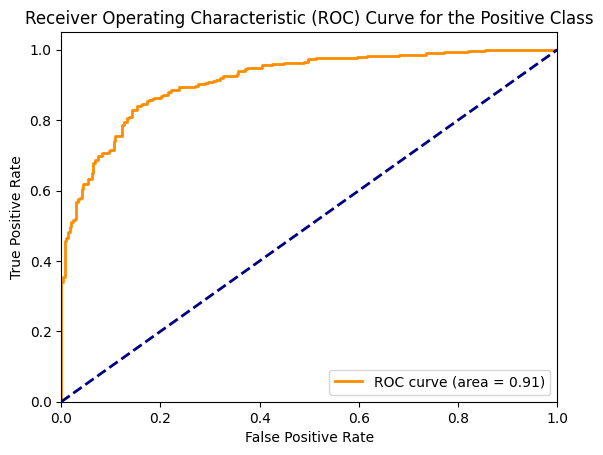

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_rn[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

### 3. EFFICIENT NET

In [ ]:
# Funtional API
import autokeras as ak
import tensorflow as tf


input_node = ak.ImageInput()
output_node = ak.ImageBlock(augment=True,normalize=True, block_type = 'efficient')(input_node)
output_node = ak.ClassificationHead()(output_node)
model = ak.AutoModel(inputs=input_node,outputs=output_node,max_trials=10, overwrite=True,
                         objective='val_accuracy',
                         metrics=['accuracy'],
                         )
model.fit(X_train,y_train, validation_data = (X_val, y_val))
best_model = model.export_model()
best_model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_EfficientNet')

In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 224, 224, 3)       0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 224, 224, 3)       7         
 on)                                                             
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                             

In [ ]:
from tensorflow.keras.models import load_model
model_en =load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_EfficientNet',custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
y_pred_en = model_en.predict(X_test)

19/19 [==============================] - 3s 97ms/step


In [ ]:
y_pred_final = []
for i in range(y_pred_en.shape[0]):
    if y_pred_en[i]>=0.5:
        y_pred_final.append(1) # non-autistic
    else:
        y_pred_final.append(0) # autistic
y_pred_final = np.array(y_pred_final)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_final)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       294
           1       0.82      0.70      0.76       294

    accuracy                           0.78       588
   macro avg       0.78      0.78      0.77       588
weighted avg       0.78      0.78      0.77       588



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_final)
print(cm)

[[250  44]
 [ 88 206]]


0.846892498495997


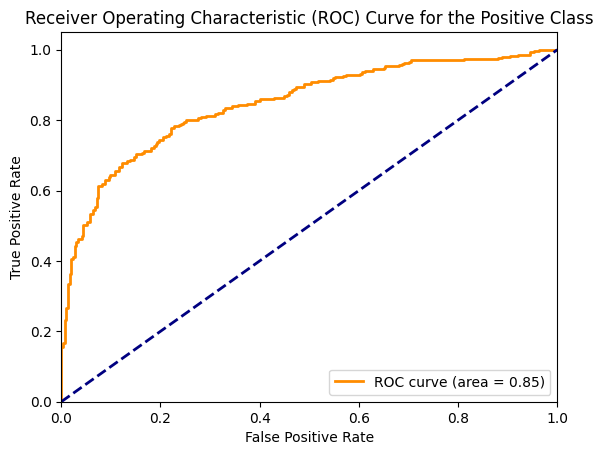

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_en[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

### **Keras Models**

### 4. MobileNet V2

#### Freezing Base Model

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.MobileNetV2(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/100
59/59 [==============================] - 18s 90ms/step - loss: 0.6682 - auc: 0.6153 - val_loss: 0.5292 - val_auc: 0.7942
Epoch 2/100
59/59 [==============================] - 3s 55ms/step - loss: 0.5367 - auc: 0.7758 - val_loss: 0.4736 - val_auc: 0.8429
Epoch 3/100
59/59 [==============================] - 3s 55ms/step - loss: 0.4935 - auc: 0.8061 - val_loss: 0.4476 - val_auc: 0.8401
Epoch 4/100
59/59 [==============================] - 3s 55ms/step - loss: 0.4719 - auc: 0.8185 - val_loss: 0.4300 - val_auc: 0.8542
Epoch 5/100
59/59 [==============================] - 3s 55ms/step - loss: 0.4526 - auc: 0.8360 - val_loss: 0.4324 - val_auc: 0.8337
Epoch 6/100
59/59 [==============================] - 3s 55ms/step - loss: 0.4421 - auc: 0.8447 - val_loss: 0.4188 - val_auc: 0.8625
Epoch 7/100
59/59 [==============================] - 3s 55ms/step - loss: 0.4291 - auc: 0.8455 - val_loss: 0.4140 - val_auc: 0.8503
Epoch 8/100
59/59 [==============================] - 3s 55ms/step - loss: 0

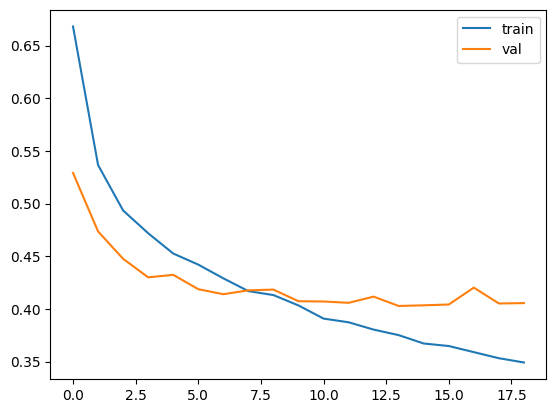

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV2_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV2_dense.h5')

In [ ]:
y_pred_mn_v2 = model.predict(X_test)

19/19 [==============================] - 10s 62ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_mn_v2.shape[0]):
  if y_pred_mn_v2[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[254  40]
 [ 96 198]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       294
           1       0.83      0.67      0.74       294

    accuracy                           0.77       588
   macro avg       0.78      0.77      0.77       588
weighted avg       0.78      0.77      0.77       588



0.8631357304826692


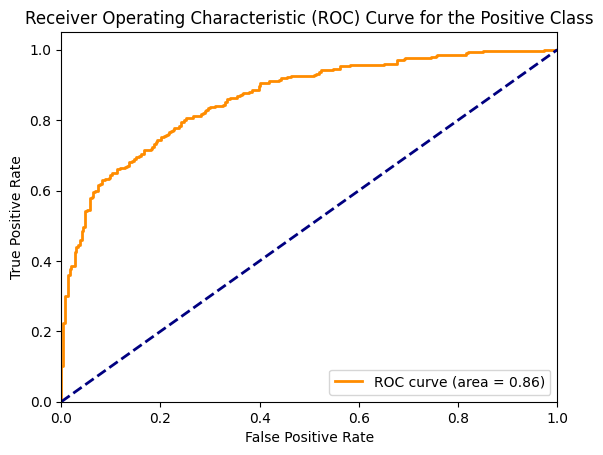

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_mn_v2[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

#### Unfreezing Base Model

In [ ]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
# convert to tensorflow tensors for FINE TUNING
with tf.device('/GPU:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

   X_val = tf.convert_to_tensor(X_val, np.float32)
   y_val = tf.convert_to_tensor(y_val, np.float32)

   X_test = tf.convert_to_tensor(X_test, np.float32)

Epoch 1/100
59/59 [==============================] - 27s 405ms/step - loss: 1.0137 - auc_1: 0.4947 - val_loss: 0.4033 - val_auc_1: 0.8535
Epoch 2/100
59/59 [==============================] - 23s 386ms/step - loss: 0.9422 - auc_1: 0.4945 - val_loss: 0.4038 - val_auc_1: 0.8601
Epoch 3/100
59/59 [==============================] - 23s 390ms/step - loss: 0.8795 - auc_1: 0.4939 - val_loss: 0.4062 - val_auc_1: 0.8594
Epoch 4/100
59/59 [==============================] - 23s 392ms/step - loss: 0.8365 - auc_1: 0.4957 - val_loss: 0.4098 - val_auc_1: 0.8531
Epoch 5/100
59/59 [==============================] - 23s 390ms/step - loss: 0.7911 - auc_1: 0.4971 - val_loss: 0.4134 - val_auc_1: 0.8494
Epoch 6/100
59/59 [==============================] - 24s 399ms/step - loss: 0.7733 - auc_1: 0.4957 - val_loss: 0.4167 - val_auc_1: 0.8464
Epoch 6: early stopping


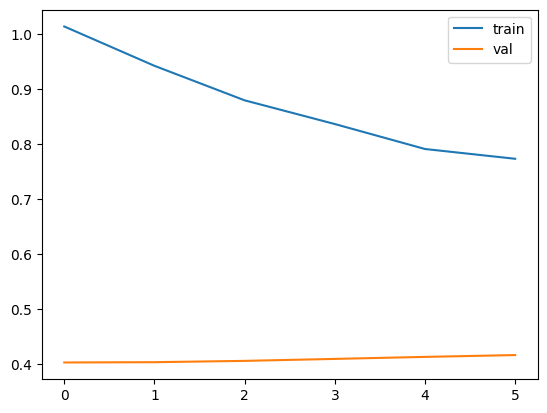

In [ ]:
# FINE TUNING
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val),# data for validation
                    verbose=1, callbacks=[es]
                    )

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Fine-Tuned Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV2_fine_tuned.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV2_fine_tuned.h5')

In [ ]:
y_pred_mn_v2 = model.predict(X_test)

19/19 [==============================] - 2s 43ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_mn_v2.shape[0]):
  if y_pred_mn_v2[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[230  64]
 [ 69 225]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       294
           1       0.78      0.77      0.77       294

    accuracy                           0.77       588
   macro avg       0.77      0.77      0.77       588
weighted avg       0.77      0.77      0.77       588



### 5. MobileNet V3

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.MobileNetV3Large(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

12683000/12683000 [==============================] - 2s 0us/step


In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/100
59/59 [==============================] - 10s 88ms/step - loss: 0.6958 - auc_2: 0.4961 - val_loss: 0.6913 - val_auc_2: 0.5064
Epoch 2/100
59/59 [==============================] - 3s 52ms/step - loss: 0.6910 - auc_2: 0.5239 - val_loss: 0.6893 - val_auc_2: 0.5000
Epoch 3/100
59/59 [==============================] - 3s 53ms/step - loss: 0.6866 - auc_2: 0.5636 - val_loss: 0.6896 - val_auc_2: 0.6633
Epoch 4/100
59/59 [==============================] - 3s 54ms/step - loss: 0.6847 - auc_2: 0.5965 - val_loss: 0.6842 - val_auc_2: 0.6630
Epoch 5/100
59/59 [==============================] - 3s 53ms/step - loss: 0.6823 - auc_2: 0.6157 - val_loss: 0.6810 - val_auc_2: 0.6523
Epoch 6/100
59/59 [==============================] - 3s 53ms/step - loss: 0.6801 - auc_2: 0.6326 - val_loss: 0.6793 - val_auc_2: 0.6168
Epoch 7/100
59/59 [==============================] - 3s 52ms/step - loss: 0.6784 - auc_2: 0.6118 - val_loss: 0.6779 - val_auc_2: 0.6172
Epoch 8/100
59/59 [============================

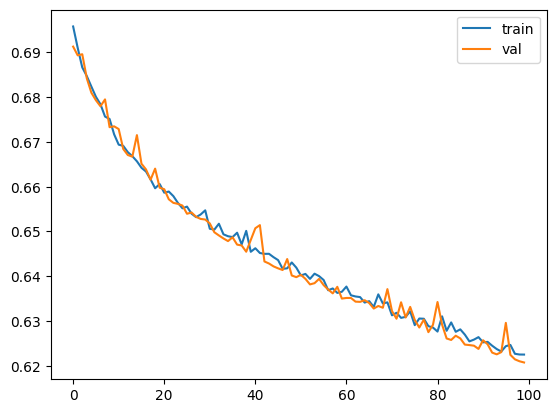

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV3_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV3_dense.h5')

In [ ]:
y_pred_mn_v3 = model.predict(X_test)

19/19 [==============================] - 3s 64ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_mn_v3.shape[0]):
  if y_pred_mn_v3[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[262  32]
 [189 105]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.58      0.89      0.70       294
           1       0.77      0.36      0.49       294

    accuracy                           0.62       588
   macro avg       0.67      0.62      0.60       588
weighted avg       0.67      0.62      0.60       588



0.6846337174325512


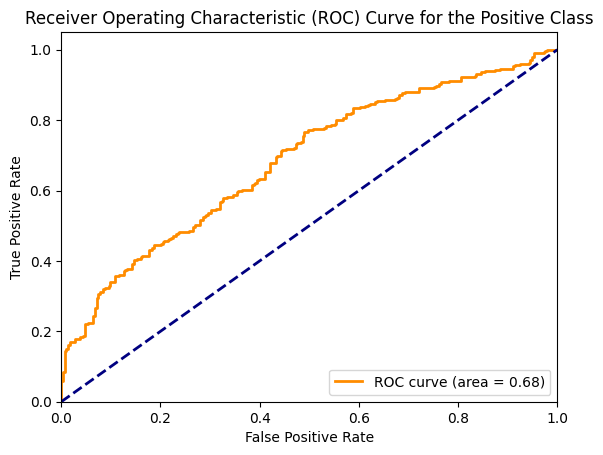

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_mn_v3[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
# convert to tensorflow tensors for FINE TUNING
with tf.device('/GPU:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

   X_val = tf.convert_to_tensor(X_val, np.float32)
   y_val = tf.convert_to_tensor(y_val, np.float32)

   X_test = tf.convert_to_tensor(X_test, np.float32)

Epoch 1/100
59/59 [==============================] - 28s 404ms/step - loss: 0.8054 - auc_3: 0.5179 - val_loss: 0.6207 - val_auc_3: 0.7091
Epoch 2/100
59/59 [==============================] - 23s 388ms/step - loss: 0.7973 - auc_3: 0.5164 - val_loss: 0.6211 - val_auc_3: 0.7013
Epoch 3/100
59/59 [==============================] - 23s 390ms/step - loss: 0.7881 - auc_3: 0.4949 - val_loss: 0.6217 - val_auc_3: 0.7039
Epoch 4/100
59/59 [==============================] - 23s 388ms/step - loss: 0.7802 - auc_3: 0.5020 - val_loss: 0.6226 - val_auc_3: 0.7043
Epoch 5/100
59/59 [==============================] - 23s 397ms/step - loss: 0.7732 - auc_3: 0.5245 - val_loss: 0.6239 - val_auc_3: 0.7038
Epoch 6/100
59/59 [==============================] - 23s 390ms/step - loss: 0.7653 - auc_3: 0.5149 - val_loss: 0.6253 - val_auc_3: 0.6910
Epoch 6: early stopping


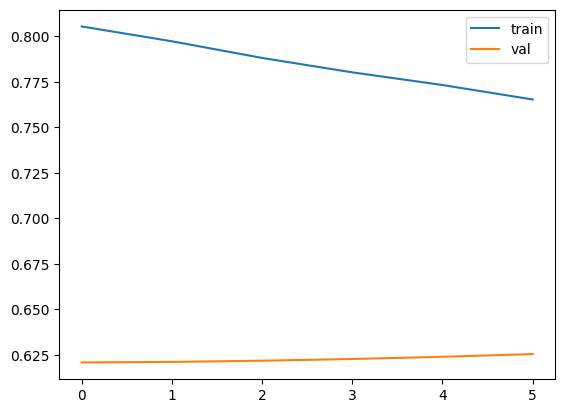

In [ ]:
# FINE TUNING
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val),# data for validation
                    verbose=1, callbacks=[es]
                    )

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Fine-Tuned Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV3_fine_tuned.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_mobileNetV3_fine_tuned.h5')

In [ ]:
y_pred_mn_v3 = model.predict(X_test)

19/19 [==============================] - 2s 40ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_mn_v3.shape[0]):
  if y_pred_mn_v3[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[289   5]
 [244  50]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70       294
           1       0.91      0.17      0.29       294

    accuracy                           0.58       588
   macro avg       0.73      0.58      0.49       588
weighted avg       0.73      0.58      0.49       588



### 6. INCEPTION NET V3

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.InceptionV3(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/100
59/59 [==============================] - 15s 140ms/step - loss: 0.6043 - auc_4: 0.7006 - val_loss: 0.5394 - val_auc_4: 0.7758
Epoch 2/100
59/59 [==============================] - 5s 89ms/step - loss: 0.5247 - auc_4: 0.7799 - val_loss: 0.5080 - val_auc_4: 0.8067
Epoch 3/100
59/59 [==============================] - 5s 90ms/step - loss: 0.4963 - auc_4: 0.7983 - val_loss: 0.5005 - val_auc_4: 0.8122
Epoch 4/100
59/59 [==============================] - 5s 91ms/step - loss: 0.4764 - auc_4: 0.8142 - val_loss: 0.4768 - val_auc_4: 0.8168
Epoch 5/100
59/59 [==============================] - 5s 90ms/step - loss: 0.4589 - auc_4: 0.8246 - val_loss: 0.4718 - val_auc_4: 0.8209
Epoch 6/100
59/59 [==============================] - 5s 89ms/step - loss: 0.4502 - auc_4: 0.8289 - val_loss: 0.4640 - val_auc_4: 0.8244
Epoch 7/100
59/59 [==============================] - 5s 89ms/step - loss: 0.4407 - auc_4: 0.8312 - val_loss: 0.4600 - val_auc_4: 0.8244
Epoch 8/100
59/59 [===========================

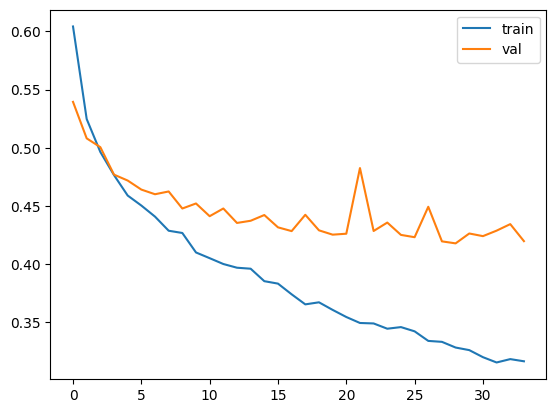

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionv3_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionv3_dense.h5')

In [ ]:
y_pred_in = model.predict(X_test)

19/19 [==============================] - 6s 137ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_in.shape[0]):
  if y_pred_in[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[243  51]
 [ 77 217]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       294
           1       0.81      0.74      0.77       294

    accuracy                           0.78       588
   macro avg       0.78      0.78      0.78       588
weighted avg       0.78      0.78      0.78       588



0.8654033041788143


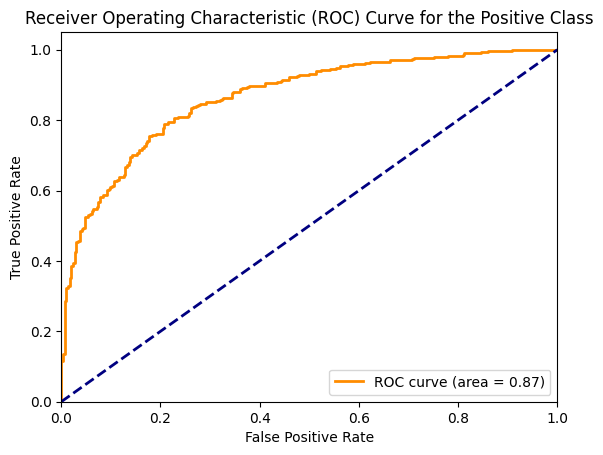

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_in[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
# convert to tensorflow tensors for FINE TUNING
with tf.device('/GPU:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

   X_val = tf.convert_to_tensor(X_val, np.float32)
   y_val = tf.convert_to_tensor(y_val, np.float32)

   X_test = tf.convert_to_tensor(X_test, np.float32)

Epoch 1/100
59/59 [==============================] - 30s 438ms/step - loss: 0.8176 - auc_6: 0.4951 - val_loss: 0.4284 - val_auc_6: 0.8440
Epoch 2/100
59/59 [==============================] - 24s 399ms/step - loss: 0.7956 - auc_6: 0.5023 - val_loss: 0.4361 - val_auc_6: 0.8325
Epoch 3/100
59/59 [==============================] - 25s 417ms/step - loss: 0.7883 - auc_6: 0.4904 - val_loss: 0.4436 - val_auc_6: 0.8361
Epoch 4/100
59/59 [==============================] - 24s 410ms/step - loss: 0.7836 - auc_6: 0.4911 - val_loss: 0.4478 - val_auc_6: 0.8366
Epoch 5/100
59/59 [==============================] - 24s 407ms/step - loss: 0.7641 - auc_6: 0.5023 - val_loss: 0.4524 - val_auc_6: 0.8350
Epoch 6/100
59/59 [==============================] - 25s 417ms/step - loss: 0.7636 - auc_6: 0.4899 - val_loss: 0.4570 - val_auc_6: 0.8358
Epoch 7/100
59/59 [==============================] - 24s 412ms/step - loss: 0.7660 - auc_6: 0.4952 - val_loss: 0.4619 - val_auc_6: 0.8339
Epoch 8/100
59/59 [===============

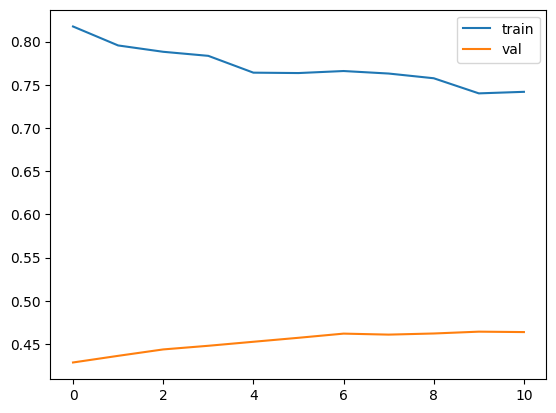

In [ ]:
# FINE TUNING
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val),# data for validation
                    verbose=1, callbacks=[es]
                    )

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Fine-Tuned Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionv3_fine_tuned.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionv3_fine_tuned.h5')

In [ ]:
y_pred_in = model.predict(X_test)

19/19 [==============================] - 3s 71ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_in.shape[0]):
  if y_pred_in[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[212  82]
 [ 45 249]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       294
           1       0.75      0.85      0.80       294

    accuracy                           0.78       588
   macro avg       0.79      0.78      0.78       588
weighted avg       0.79      0.78      0.78       588



### 7. NasNet Large

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.NASNetLarge(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

343610240/343610240 [==============================] - 18s 0us/step


In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/100
59/59 [==============================] - 56s 619ms/step - loss: 0.5966 - auc_7: 0.6999 - val_loss: 0.5196 - val_auc_7: 0.7900
Epoch 2/100
59/59 [==============================] - 29s 487ms/step - loss: 0.5173 - auc_7: 0.7821 - val_loss: 0.4927 - val_auc_7: 0.8166
Epoch 3/100
59/59 [==============================] - 29s 488ms/step - loss: 0.4850 - auc_7: 0.7959 - val_loss: 0.5212 - val_auc_7: 0.8252
Epoch 4/100
59/59 [==============================] - 29s 490ms/step - loss: 0.4641 - auc_7: 0.8198 - val_loss: 0.4946 - val_auc_7: 0.8330
Epoch 5/100
59/59 [==============================] - 29s 490ms/step - loss: 0.4455 - auc_7: 0.8258 - val_loss: 0.4992 - val_auc_7: 0.8397
Epoch 6/100
59/59 [==============================] - 29s 490ms/step - loss: 0.4268 - auc_7: 0.8458 - val_loss: 0.4714 - val_auc_7: 0.8344
Epoch 7/100
59/59 [==============================] - 29s 489ms/step - loss: 0.4108 - auc_7: 0.8522 - val_loss: 0.4708 - val_auc_7: 0.8157
Epoch 8/100
59/59 [===============

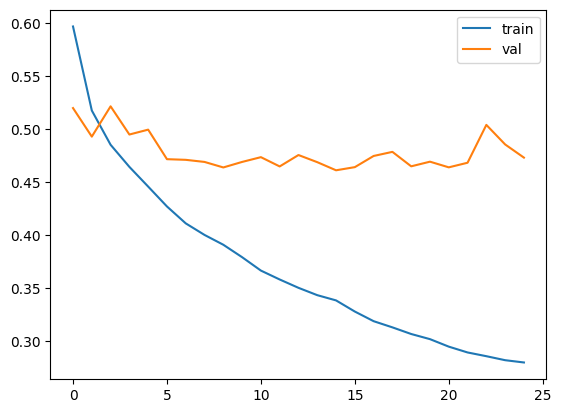

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_NasNet_large_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_NasNet_large_dense.h5')

In [ ]:
y_pred_nasnet = model.predict(X_test)

19/19 [==============================] - 15s 429ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_nasnet.shape[0]):
  if y_pred_nasnet[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[252  42]
 [ 94 200]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       294
           1       0.83      0.68      0.75       294

    accuracy                           0.77       588
   macro avg       0.78      0.77      0.77       588
weighted avg       0.78      0.77      0.77       588



0.8533018649636726


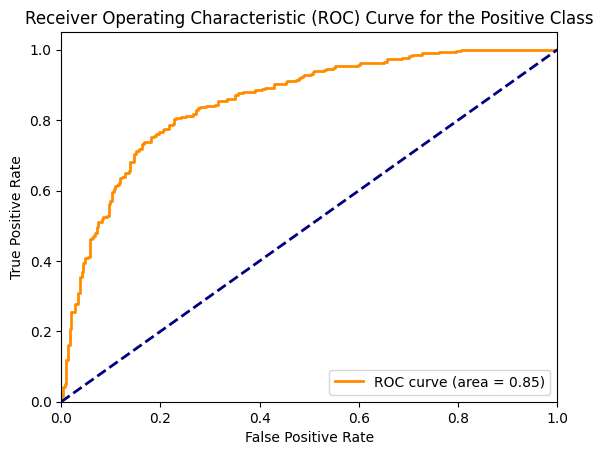

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_nasnet[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
# convert to tensorflow tensors for FINE TUNING
with tf.device('/GPU:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

   X_val = tf.convert_to_tensor(X_val, np.float32)
   y_val = tf.convert_to_tensor(y_val, np.float32)

   X_test = tf.convert_to_tensor(X_test, np.float32)

Epoch 1/100
59/59 [==============================] - 54s 611ms/step - loss: 1.2955 - auc_8: 0.4989 - val_loss: 0.4744 - val_auc_8: 0.8273
Epoch 2/100
59/59 [==============================] - 30s 500ms/step - loss: 1.2864 - auc_8: 0.5005 - val_loss: 0.4769 - val_auc_8: 0.8247
Epoch 3/100
59/59 [==============================] - 29s 495ms/step - loss: 1.2863 - auc_8: 0.4995 - val_loss: 0.4814 - val_auc_8: 0.8226
Epoch 4/100
59/59 [==============================] - 29s 495ms/step - loss: 1.2803 - auc_8: 0.5000 - val_loss: 0.4862 - val_auc_8: 0.8228
Epoch 5/100
59/59 [==============================] - 29s 496ms/step - loss: 1.2800 - auc_8: 0.4989 - val_loss: 0.4911 - val_auc_8: 0.8221
Epoch 6/100
59/59 [==============================] - 30s 503ms/step - loss: 1.2754 - auc_8: 0.4995 - val_loss: 0.4993 - val_auc_8: 0.8215
Epoch 7/100
59/59 [==============================] - 30s 505ms/step - loss: 1.2751 - auc_8: 0.4984 - val_loss: 0.5060 - val_auc_8: 0.8218
Epoch 8/100
59/59 [===============

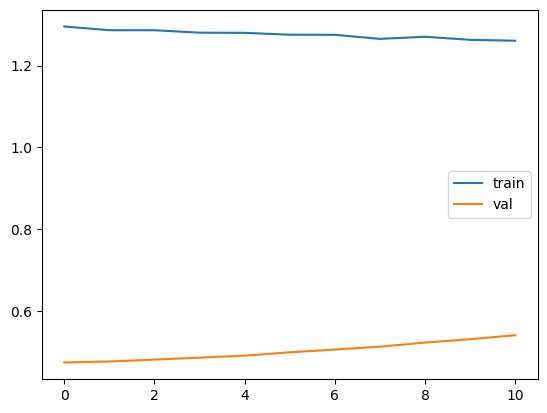

In [ ]:
# FINE TUNING
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val),# data for validation
                    verbose=1, callbacks=[es]
                    )

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Fine-Tuned Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_Nasnet_large_fine_tuned.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_Nasnet_large_fine_tuned.h5')

In [ ]:
y_pred_nasnet = model.predict(X_test)

19/19 [==============================] - 13s 371ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_nasnet.shape[0]):
  if y_pred_nasnet[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[211  83]
 [ 52 242]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       294
           1       0.74      0.82      0.78       294

    accuracy                           0.77       588
   macro avg       0.77      0.77      0.77       588
weighted avg       0.77      0.77      0.77       588



### 8. VGG16

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.VGG16(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/100
59/59 [==============================] - 19s 231ms/step - loss: 0.6956 - auc_9: 0.5438 - val_loss: 0.6748 - val_auc_9: 0.7112
Epoch 2/100
59/59 [==============================] - 10s 171ms/step - loss: 0.6604 - auc_9: 0.6985 - val_loss: 0.6477 - val_auc_9: 0.7550
Epoch 3/100
59/59 [==============================] - 10s 167ms/step - loss: 0.6362 - auc_9: 0.7244 - val_loss: 0.6308 - val_auc_9: 0.7705
Epoch 4/100
59/59 [==============================] - 10s 164ms/step - loss: 0.6194 - auc_9: 0.7570 - val_loss: 0.6148 - val_auc_9: 0.7754
Epoch 5/100
59/59 [==============================] - 9s 161ms/step - loss: 0.6056 - auc_9: 0.7618 - val_loss: 0.5971 - val_auc_9: 0.7689
Epoch 6/100
59/59 [==============================] - 9s 160ms/step - loss: 0.5905 - auc_9: 0.7734 - val_loss: 0.5934 - val_auc_9: 0.7283
Epoch 7/100
59/59 [==============================] - 9s 160ms/step - loss: 0.5838 - auc_9: 0.7678 - val_loss: 0.5774 - val_auc_9: 0.7702
Epoch 8/100
59/59 [==================

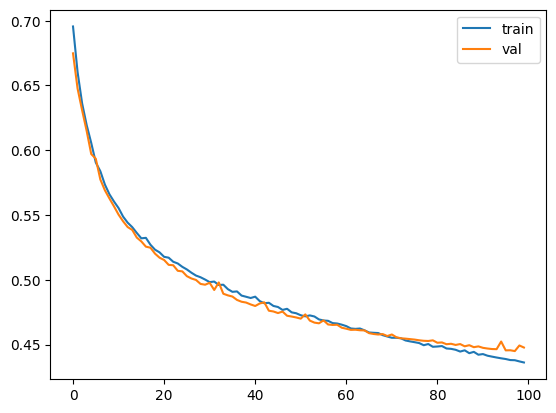

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_VGG16_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_VGG16_dense.h5')

In [ ]:
y_pred_vgg16 = model.predict(X_test)

19/19 [==============================] - 10s 262ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_vgg16.shape[0]):
  if y_pred_vgg16[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[248  46]
 [ 80 214]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       294
           1       0.82      0.73      0.77       294

    accuracy                           0.79       588
   macro avg       0.79      0.79      0.78       588
weighted avg       0.79      0.79      0.78       588



0.8622680364662871


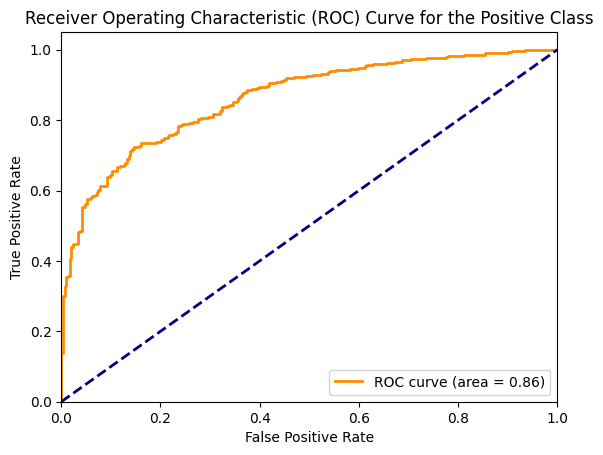

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_vgg16[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
# convert to tensorflow tensors for FINE TUNING
with tf.device('/GPU:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

   X_val = tf.convert_to_tensor(X_val, np.float32)
   y_val = tf.convert_to_tensor(y_val, np.float32)

   X_test = tf.convert_to_tensor(X_test, np.float32)

Epoch 1/100
59/59 [==============================] - 26s 418ms/step - loss: 0.9491 - auc_10: 0.4989 - val_loss: 0.4465 - val_auc_10: 0.8327
Epoch 2/100
59/59 [==============================] - 24s 400ms/step - loss: 0.9368 - auc_10: 0.5048 - val_loss: 0.4456 - val_auc_10: 0.8340
Epoch 3/100
59/59 [==============================] - 24s 401ms/step - loss: 0.9247 - auc_10: 0.5069 - val_loss: 0.4450 - val_auc_10: 0.8295
Epoch 4/100
59/59 [==============================] - 24s 403ms/step - loss: 0.9212 - auc_10: 0.5016 - val_loss: 0.4446 - val_auc_10: 0.8250
Epoch 5/100
59/59 [==============================] - 24s 400ms/step - loss: 0.9115 - auc_10: 0.5031 - val_loss: 0.4445 - val_auc_10: 0.8259
Epoch 6/100
59/59 [==============================] - 24s 401ms/step - loss: 0.9000 - auc_10: 0.5048 - val_loss: 0.4447 - val_auc_10: 0.8256
Epoch 7/100
59/59 [==============================] - 24s 398ms/step - loss: 0.8989 - auc_10: 0.4973 - val_loss: 0.4452 - val_auc_10: 0.8261
Epoch 8/100
59/59 [=

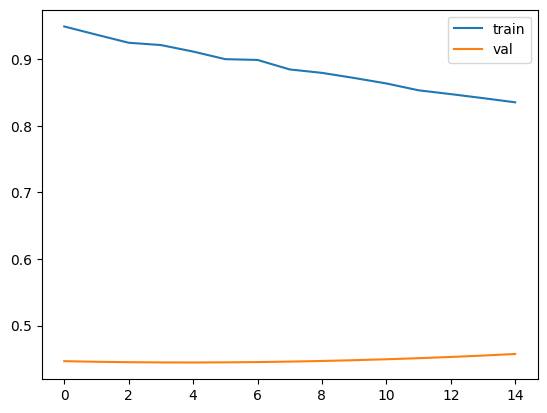

In [ ]:
# FINE TUNING
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val),# data for validation
                    verbose=1, callbacks=[es]
                    )

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Fine-Tuned Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_vgg16_fine_tuned.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_vgg16_fine_tuned.h5')

In [ ]:
y_pred_vgg16 = model.predict(X_test)

19/19 [==============================] - 2s 128ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_vgg16.shape[0]):
  if y_pred_vgg16[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[277  17]
 [123 171]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       294
           1       0.91      0.58      0.71       294

    accuracy                           0.76       588
   macro avg       0.80      0.76      0.75       588
weighted avg       0.80      0.76      0.75       588



### 9. VGG19

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.VGG19(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/100
59/59 [==============================] - 13s 204ms/step - loss: 0.6700 - auc_11: 0.6447 - val_loss: 0.6496 - val_auc_11: 0.7575
Epoch 2/100
59/59 [==============================] - 12s 204ms/step - loss: 0.6348 - auc_11: 0.7455 - val_loss: 0.6206 - val_auc_11: 0.7441
Epoch 3/100
59/59 [==============================] - 12s 201ms/step - loss: 0.6151 - auc_11: 0.7351 - val_loss: 0.5976 - val_auc_11: 0.7757
Epoch 4/100
59/59 [==============================] - 12s 198ms/step - loss: 0.5949 - auc_11: 0.7502 - val_loss: 0.5826 - val_auc_11: 0.7819
Epoch 5/100
59/59 [==============================] - 12s 196ms/step - loss: 0.5798 - auc_11: 0.7753 - val_loss: 0.5709 - val_auc_11: 0.7852
Epoch 6/100
59/59 [==============================] - 11s 195ms/step - loss: 0.5703 - auc_11: 0.7744 - val_loss: 0.5570 - val_auc_11: 0.7704
Epoch 7/100
59/59 [==============================] - 12s 197ms/step - loss: 0.5586 - auc_11: 0.7805 - val_loss: 0.5492 - val_auc_11: 0.7714
Epoch 8/100
59/59 [=

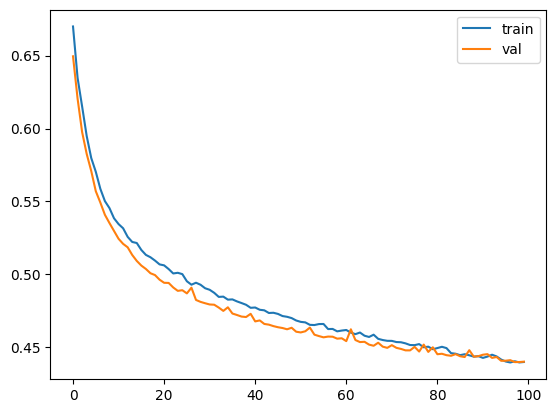

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_VGG19_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_VGG19_dense.h5')

In [ ]:
y_pred_vgg19 = model.predict(X_test)

19/19 [==============================] - 3s 165ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_vgg19.shape[0]):
  if y_pred_vgg19[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[253  41]
 [ 91 203]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79       294
           1       0.83      0.69      0.75       294

    accuracy                           0.78       588
   macro avg       0.78      0.78      0.77       588
weighted avg       0.78      0.78      0.77       588



0.8562404553658198


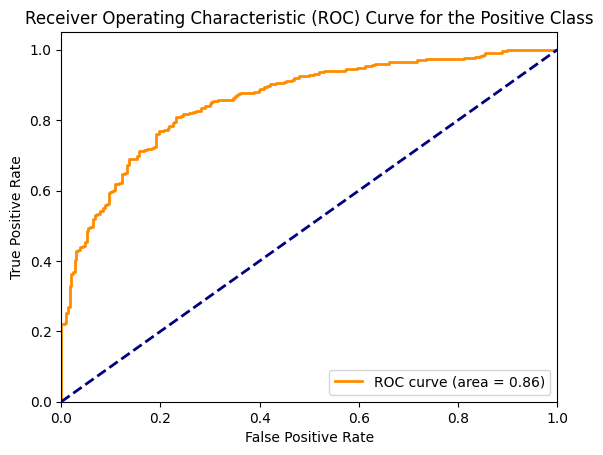

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_vgg19[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
# convert to tensorflow tensors for FINE TUNING
with tf.device('/GPU:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

   X_val = tf.convert_to_tensor(X_val, np.float32)
   y_val = tf.convert_to_tensor(y_val, np.float32)

   X_test = tf.convert_to_tensor(X_test, np.float32)

Epoch 1/100
59/59 [==============================] - 27s 409ms/step - loss: 1.5041 - auc_12: 0.5016 - val_loss: 0.4394 - val_auc_12: 0.8201
Epoch 2/100
59/59 [==============================] - 25s 426ms/step - loss: 1.4887 - auc_12: 0.5027 - val_loss: 0.4392 - val_auc_12: 0.8140
Epoch 3/100
59/59 [==============================] - 25s 425ms/step - loss: 1.4707 - auc_12: 0.5000 - val_loss: 0.4395 - val_auc_12: 0.8075
Epoch 4/100
59/59 [==============================] - 25s 420ms/step - loss: 1.4543 - auc_12: 0.5032 - val_loss: 0.4401 - val_auc_12: 0.8028
Epoch 5/100
59/59 [==============================] - 25s 419ms/step - loss: 1.4378 - auc_12: 0.5032 - val_loss: 0.4412 - val_auc_12: 0.7995
Epoch 6/100
59/59 [==============================] - 25s 423ms/step - loss: 1.4185 - auc_12: 0.5085 - val_loss: 0.4426 - val_auc_12: 0.7937
Epoch 7/100
59/59 [==============================] - 25s 421ms/step - loss: 1.3956 - auc_12: 0.5037 - val_loss: 0.4445 - val_auc_12: 0.7925
Epoch 8/100
59/59 [=

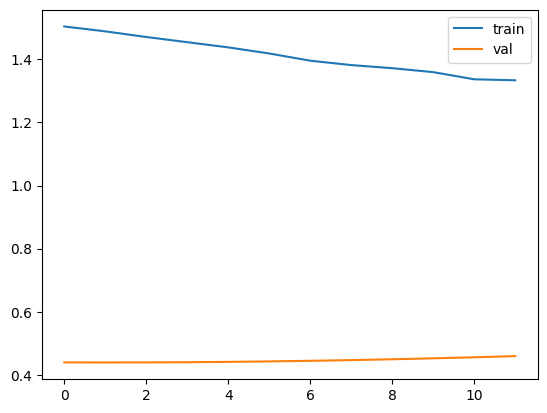

In [ ]:
# FINE TUNING
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_val, y_val),# data for validation
                    verbose=1, callbacks=[es]
                    )

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Fine-Tuned Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_vgg19_fine_tuned.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_vgg19_fine_tuned.h5')

In [ ]:
y_pred_vgg19 = model.predict(X_test)

19/19 [==============================] - 16s 233ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_vgg19.shape[0]):
  if y_pred_vgg19[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[273  21]
 [139 155]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       294
           1       0.88      0.53      0.66       294

    accuracy                           0.73       588
   macro avg       0.77      0.73      0.72       588
weighted avg       0.77      0.73      0.72       588



### 10. Inception Resnet

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.InceptionResNetV2(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

219055592/219055592 [==============================] - 1s 0us/step


In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/500
59/59 [==============================] - 18s 312ms/step - loss: 0.5902 - auc: 0.7172 - val_loss: 0.5193 - val_auc: 0.7676
Epoch 2/500
59/59 [==============================] - 13s 224ms/step - loss: 0.5303 - auc: 0.7639 - val_loss: 0.4943 - val_auc: 0.7991
Epoch 3/500
59/59 [==============================] - 13s 224ms/step - loss: 0.5080 - auc: 0.7905 - val_loss: 0.5014 - val_auc: 0.7812
Epoch 4/500
59/59 [==============================] - 13s 217ms/step - loss: 0.4922 - auc: 0.7976 - val_loss: 0.4731 - val_auc: 0.8229
Epoch 5/500
59/59 [==============================] - 13s 214ms/step - loss: 0.4872 - auc: 0.8019 - val_loss: 0.4664 - val_auc: 0.8178
Epoch 6/500
59/59 [==============================] - 13s 214ms/step - loss: 0.4708 - auc: 0.8155 - val_loss: 0.4628 - val_auc: 0.8153
Epoch 7/500
59/59 [==============================] - 13s 214ms/step - loss: 0.4655 - auc: 0.8115 - val_loss: 0.4569 - val_auc: 0.8164
Epoch 8/500
59/59 [==============================] - 13s 215ms

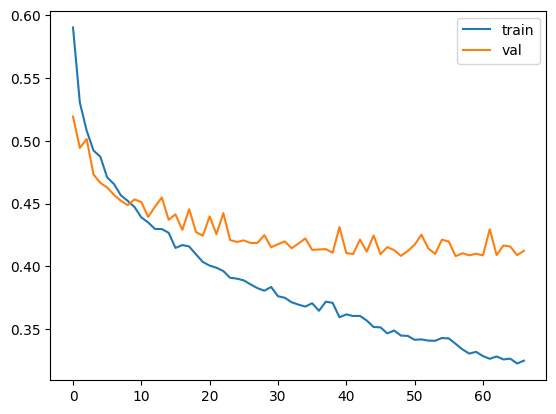

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionresnet_dense.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionresnet_dense.h5')

In [ ]:
y_pred_ir = model.predict(X_test)

19/19 [==============================] - 6s 166ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_ir.shape[0]):
  if y_pred_ir[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[253  41]
 [ 75 219]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       294
           1       0.84      0.74      0.79       294

    accuracy                           0.80       588
   macro avg       0.81      0.80      0.80       588
weighted avg       0.81      0.80      0.80       588



In [ ]:
# ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [ ]:
# convert to tensorflow tensors for FINE TUNING
with tf.device('/GPU:0'):
   X_train = tf.convert_to_tensor(X_train, np.float32)
   y_train = tf.convert_to_tensor(y_train, np.float32)

   X_val = tf.convert_to_tensor(X_val, np.float32)
   y_val = tf.convert_to_tensor(y_val, np.float32)

   X_test = tf.convert_to_tensor(X_test, np.float32)

Epoch 1/500
118/118 [==============================] - 126s 385ms/step - loss: 0.7101 - auc_2: 0.4932 - val_loss: 0.4415 - val_auc_2: 0.8488
Epoch 2/500
118/118 [==============================] - 39s 330ms/step - loss: 0.6930 - auc_2: 0.4956 - val_loss: 0.4477 - val_auc_2: 0.8464
Epoch 3/500
118/118 [==============================] - 39s 332ms/step - loss: 0.6914 - auc_2: 0.5035 - val_loss: 0.4726 - val_auc_2: 0.7952
Epoch 4/500
118/118 [==============================] - 39s 331ms/step - loss: 0.6953 - auc_2: 0.5008 - val_loss: 0.4838 - val_auc_2: 0.8140
Epoch 5/500
118/118 [==============================] - 39s 331ms/step - loss: 0.6916 - auc_2: 0.4975 - val_loss: 0.5135 - val_auc_2: 0.7757
Epoch 6/500
118/118 [==============================] - 39s 331ms/step - loss: 0.6942 - auc_2: 0.5083 - val_loss: 0.5089 - val_auc_2: 0.8458
Epoch 7/500
118/118 [==============================] - 39s 331ms/step - loss: 0.6925 - auc_2: 0.5008 - val_loss: 0.5119 - val_auc_2: 0.8299
Epoch 8/500
118/118

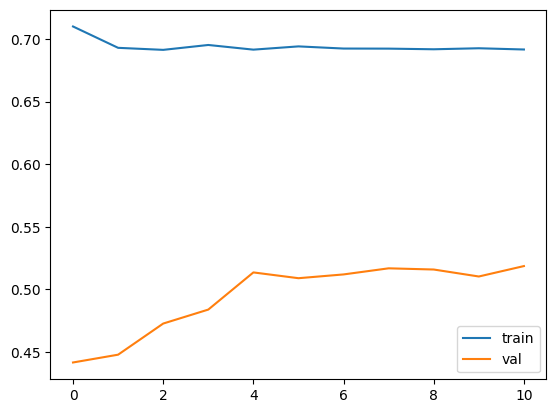

In [ ]:
# FINE TUNING
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=500,
                    validation_data=(X_val, y_val),# data for validation
                    verbose=1, callbacks=[es]
                    )

#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Fine-Tuned Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionresnet_fine_tuned.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/manya/Major_Project_Images/new_Inceptionresnet_fine_tuned.h5')

In [ ]:
y_pred_ir = model.predict(X_test)

19/19 [==============================] - 6s 168ms/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_ir.shape[0]):
  if y_pred_ir[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[237  57]
 [ 53 241]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       294
           1       0.81      0.82      0.81       294

    accuracy                           0.81       588
   macro avg       0.81      0.81      0.81       588
weighted avg       0.81      0.81      0.81       588



0.8670924151973715


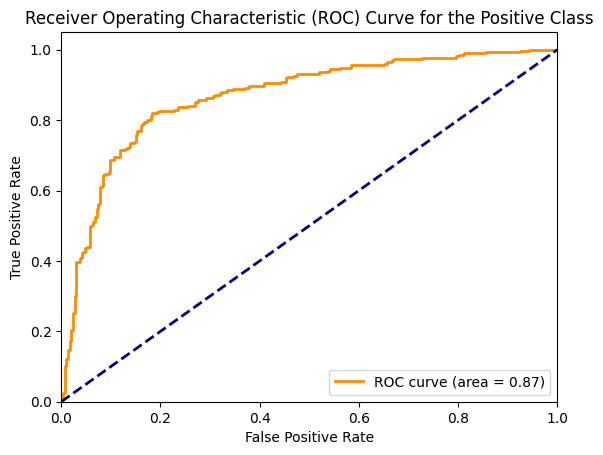

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_pred_class_0 = y_pred_ir[:, 0]
roc_auc= roc_auc_score(y_test, y_pred_class_0)
print(roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred_class_0)
roc_auc = auc(fpr, tpr)

# The following code will plot the ROC curve and AUC-ROC for the positive class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Positive Class')
plt.legend(loc='lower right')
plt.show()

### 11. ConvNext Model

In [ ]:
# Load the Base Model - Pretrained with weights
base_model=tf.keras.applications.ConvNeXtXLarge(
    include_top=False,# Do not include the ImageNet classifier at the top.
    weights="imagenet",
    input_shape=(224,224,3),
    )

In [ ]:
# Freeze Base Model - So that weights are not changed during training
base_model.trainable = False

In [ ]:
# Model - add classifier layers on top of the Base Model - Functional API
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)# Flattening to get features
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
# Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.AUC()])

Epoch 1/100
59/59 [==============================] - 145s 2s/step - loss: 0.6522 - auc_2: 0.6322 - val_loss: 0.6080 - val_auc_2: 0.7305
Epoch 2/100
59/59 [==============================] - 120s 2s/step - loss: 0.6103 - auc_2: 0.7052 - val_loss: 0.5909 - val_auc_2: 0.7195
Epoch 3/100
59/59 [==============================] - 120s 2s/step - loss: 0.5910 - auc_2: 0.7263 - val_loss: 0.5767 - val_auc_2: 0.7393
Epoch 4/100
59/59 [==============================] - 120s 2s/step - loss: 0.5734 - auc_2: 0.7388 - val_loss: 0.5524 - val_auc_2: 0.7977
Epoch 5/100
59/59 [==============================] - 120s 2s/step - loss: 0.5603 - auc_2: 0.7620 - val_loss: 0.5365 - val_auc_2: 0.8042
Epoch 6/100
59/59 [==============================] - 120s 2s/step - loss: 0.5500 - auc_2: 0.7668 - val_loss: 0.5293 - val_auc_2: 0.8174
Epoch 7/100
59/59 [==============================] - 120s 2s/step - loss: 0.5392 - auc_2: 0.7804 - val_loss: 0.5158 - val_auc_2: 0.8098
Epoch 8/100
59/59 [=============================

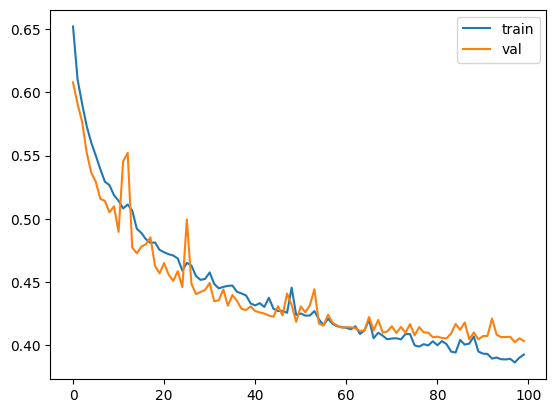

In [ ]:
# Train top classifier layers of Base Model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1, callbacks=[es])
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
# Save Base Model
model.save('/content/drive/MyDrive/manya/Major_Project_Images/new_ConvNext_dense.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred_ir = model.predict(X_test)

19/19 [==============================] - 41s 2s/step


In [ ]:
y_pred_final =[]
for i in range (0,y_pred_ir.shape[0]):
  if y_pred_ir[i]>0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
len(y_pred_final)

588

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_final))

[[251  43]
 [ 65 229]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       294
           1       0.84      0.78      0.81       294

    accuracy                           0.82       588
   macro avg       0.82      0.82      0.82       588
weighted avg       0.82      0.82      0.82       588



# **VISION TRANSFORMER**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# configuring hyperparamters

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 500
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
# data augmentation

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        # layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(X_train)


In [ ]:
# implement MLP

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
# patch creation

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [ ]:
import matplotlib.pyplot as plt

image = X_train[np.random.choice(range(X_train.shape[0]))]
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


In [ ]:
input_shape=(224,244,3)
num_classes = 2

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=(224, 224, 3))
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(X_val,y_val),
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)
model.save('/content/drive/MyDrive/manya/Major_Project_Images/Vit.h5')

Epoch 1/500
8/8 [==============================] - 16s 769ms/step - loss: 5.1058 - accuracy: 0.5314 - top-5-accuracy: 1.0000 - val_loss: 1.3728 - val_accuracy: 0.6000 - val_top-5-accuracy: 1.0000
Epoch 2/500
8/8 [==============================] - 4s 517ms/step - loss: 1.2221 - accuracy: 0.5517 - top-5-accuracy: 1.0000 - val_loss: 0.6507 - val_accuracy: 0.6681 - val_top-5-accuracy: 1.0000
Epoch 3/500
8/8 [==============================] - 3s 396ms/step - loss: 0.8183 - accuracy: 0.6092 - top-5-accuracy: 1.0000 - val_loss: 0.6083 - val_accuracy: 0.6574 - val_top-5-accuracy: 1.0000
Epoch 4/500
8/8 [==============================] - 4s 515ms/step - loss: 0.6831 - accuracy: 0.6315 - top-5-accuracy: 1.0000 - val_loss: 0.5899 - val_accuracy: 0.7000 - val_top-5-accuracy: 1.0000
Epoch 5/500
8/8 [==============================] - 3s 397ms/step - loss: 0.6366 - accuracy: 0.6603 - top-5-accuracy: 1.0000 - val_loss: 0.5725 - val_accuracy: 0.6936 - val_top-5-accuracy: 1.0000
Epoch 6/500
8/8 [=======